# Simulación en CARLA vehículo autonomo
## Analisis exploratorio

El siguiente cuaderno explora el conjunto de datos generado por el entorno CARLA de un sistema de conducción autonoma, el objetivo es analizar los datos entender los escenarios de conducción y buscar puntos de mejora para conseguir una conducción mas suave con menos errores 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_name_of_log = 'C:/Users/Usuario/Documents/Datasets/[02-07-2025 12_18_02]-pid_log.csv'

# Cargar datos
data = pd.read_csv(_name_of_log)
data.head(5)


,timestamp,Kp,Ki,Kd,yaw_error,steer_correction,acelerador,brake,target_y,vehicle_y,target_x,vehicle_x,error_x,error_y
0,02-07-2025 12:18:02.604,0.05,0.001,0.02,0.000000,0.000000,0.5,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,02-07-2025 12:18:02.676,0.05,0.001,0.02,0.955845,1.000000,0.5,0,92.572739,0.000000,0.0,0.000000,92.572739,131.064407
2,02-07-2025 12:18:02.802,0.05,0.001,0.02,-3.141591,-1.000000,0.5,0,229.640884,129.471893,0.0,228.994446,0.646439,0.000290
3,02-07-2025 12:18:02.853,0.05,0.001,0.02,-3.141591,-0.157168,0.5,0,229.640884,129.471893,0.0,228.994446,0.646439,0.000290
4,02-07-2025 12:18:02.873,0.05,0.001,0.02,-3.141591,-0.157221,0.5,0,229.640884,129.471893,0.0,228.994446,0.646439,0.000290


In [13]:
data.tail()

,timestamp,Kp,Ki,Kd,yaw_error,steer_correction,acelerador,brake,target_y,vehicle_y,target_x,vehicle_x,error_x,error_y
5359,02-07-2025 12:19:45.284,0.05,0.001,0.02,-2.316763,-0.129535,0.5,0,90.673111,131.309723,0.0,88.255424,2.417686,1.408401
5360,02-07-2025 12:19:45.303,0.05,0.001,0.02,-2.316927,-0.129861,0.5,0,90.673111,131.309891,0.0,88.255234,2.417877,1.408234
5361,02-07-2025 12:19:45.321,0.05,0.001,0.02,-2.316967,-0.129751,0.5,0,90.673111,131.309921,0.0,88.255196,2.417915,1.408203
5362,02-07-2025 12:19:45.340,0.05,0.001,0.02,-2.317155,-0.129978,0.5,0,90.673111,131.310165,0.0,88.255165,2.417946,1.407959
5363,02-07-2025 12:19:45.359,0.05,0.001,0.02,-2.317063,-0.129676,0.5,0,90.673111,131.310196,0.0,88.255348,2.417763,1.407928


### Calidad de los datos

In [14]:
import sys
import os

_nulos = data.isnull().sum()
_duplicados = data.duplicated().sum()

sys.stdout.write(f'Calidad de los datos:\n \t Nulos {_nulos} \n \t Duplicados {_duplicados}')


Calidad de los datos:
 	 Nulos timestamp           0
Kp                  0
Ki                  0
Kd                  0
yaw_error           0
steer_correction    0
acelerador          0
brake               0
target_y            0
vehicle_y           0
target_x            0
vehicle_x           0
error_x             0
error_y             0
dtype: int64 
 	 Duplicados 0

368

In [15]:
data.describe()

,Kp,Ki,Kd,yaw_error,steer_correction,acelerador,brake,target_y,vehicle_y,target_x,vehicle_x,error_x,error_y
count,5.364000e+03,5.364000e+03,5.364000e+03,5364.000000,5364.000000,5364.0,5364.0,5364.000000,5364.000000,5364.0,5364.000000,5364.000000,5364.000000
mean,5.000000e-02,1.000000e-03,2.000000e-02,-0.155850,-0.016211,0.5,0.0,159.377564,129.525919,0.0,159.173410,0.204155,0.155918
std,1.387908e-17,2.168606e-19,3.469770e-18,2.212266,0.266764,0.0,0.0,44.795293,2.541624,0.0,45.075261,1.499627,1.834682
min,5.000000e-02,1.000000e-03,2.000000e-02,-3.141591,-1.000000,0.5,0.0,0.000000,0.000000,0.0,0.000000,-1.159592,-0.033508
25%,5.000000e-02,1.000000e-03,2.000000e-02,-2.308892,-0.145464,0.5,0.0,119.640892,129.428986,0.0,119.479095,-0.442804,-0.010319
50%,5.000000e-02,1.000000e-03,2.000000e-02,-0.026285,-0.005291,0.5,0.0,159.640884,129.448219,0.0,159.565620,0.121712,0.003471
75%,5.000000e-02,1.000000e-03,2.000000e-02,0.375256,0.147435,0.5,0.0,199.640884,129.470642,0.0,199.525364,0.646564,0.017170
max,5.000000e-02,1.000000e-03,2.000000e-02,3.141574,1.000000,0.5,0.0,229.640884,131.310196,0.0,228.994446,92.572739,131.064407


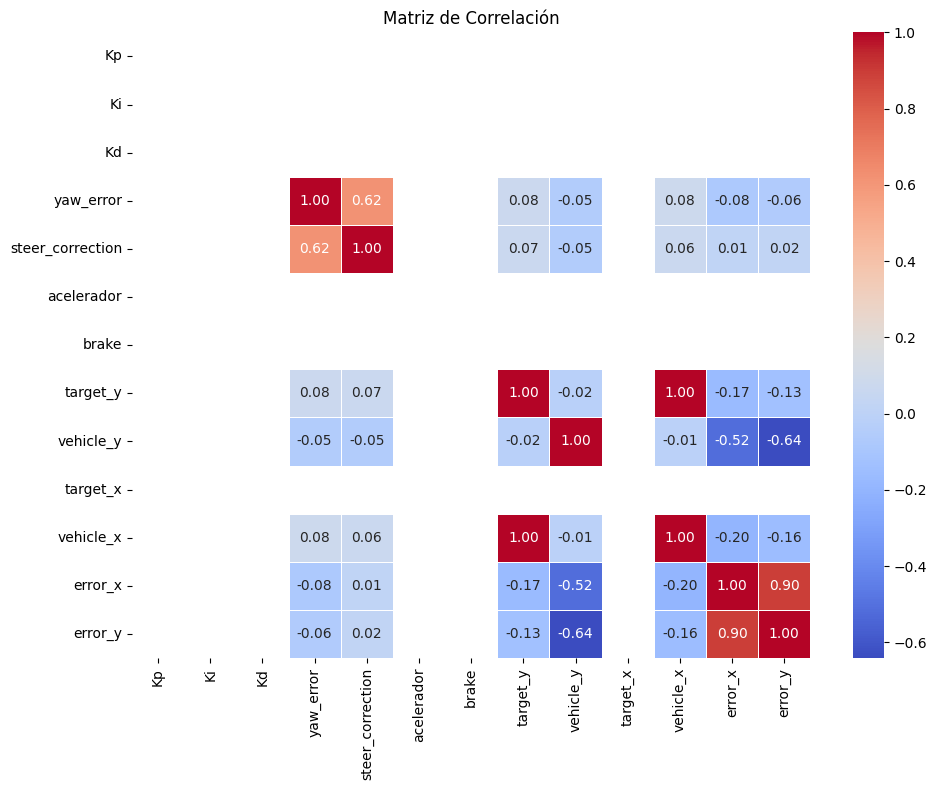

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calcular la matriz de correlación

_data_copy= data.drop(columns=['timestamp'])
correlation_matrix = _data_copy.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.tight_layout()


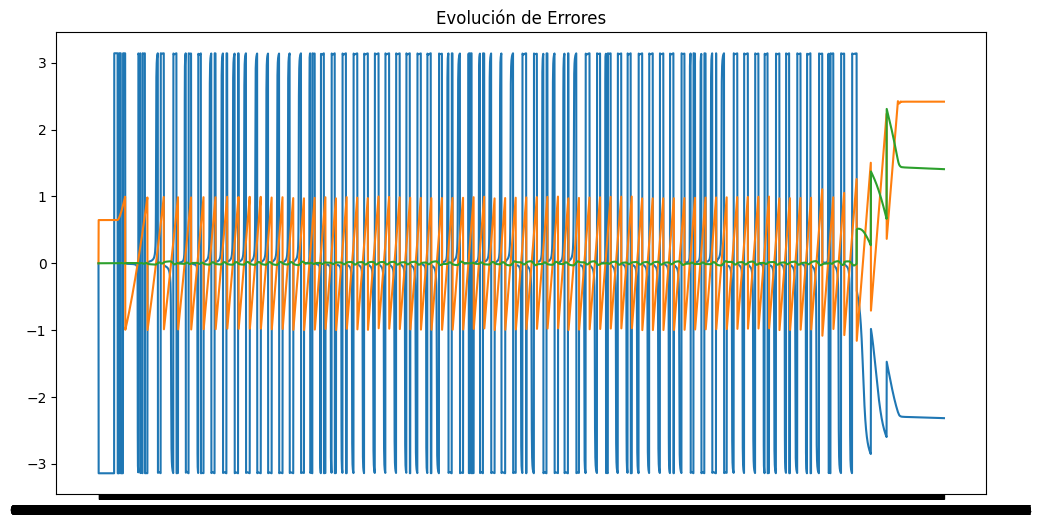

In [17]:
# Gráfico de errores vs tiempo

data = data.drop(index=1)
plt.figure(figsize=(12,6))
plt.plot(data['timestamp'], data['yaw_error'], label='Yaw Error')
plt.plot(data['timestamp'], data['error_x'], label='Error X')
plt.plot(data['timestamp'], data['error_y'], label='Error Y')
#plt.legend()
plt.title('Evolución de Errores')
#plt.xticks(rotation=45)
plt.show()


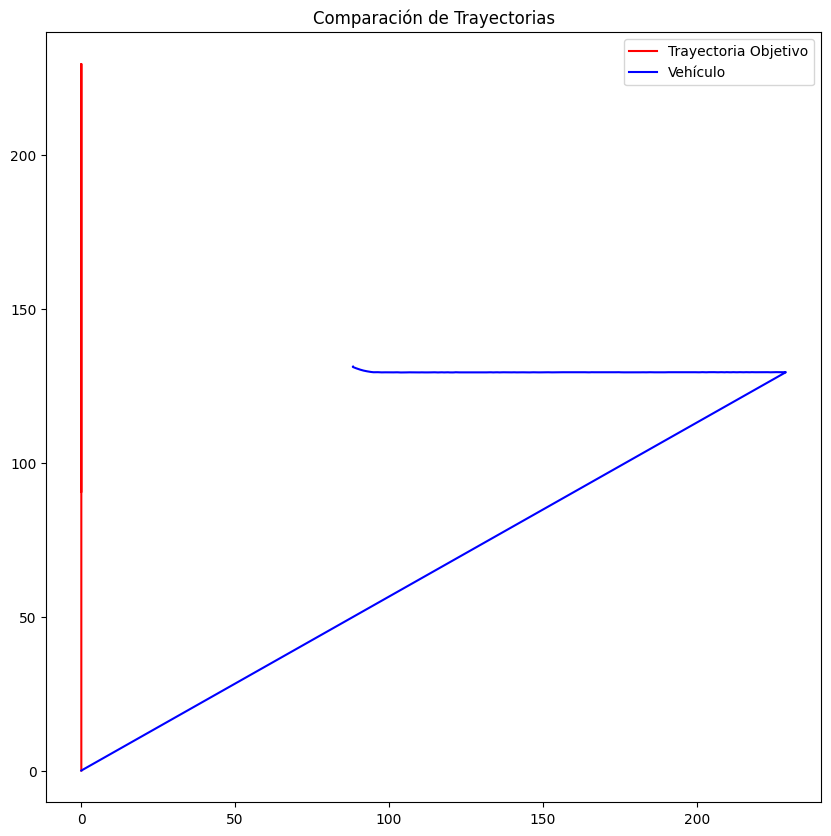

In [18]:
# Gráfico de trayectoria
plt.figure(figsize=(10,10))
plt.plot(data['target_x'], data['target_y'], 'r-', label='Trayectoria Objetivo')
plt.plot(data['vehicle_x'], data['vehicle_y'], 'b-', label='Vehículo')
plt.legend()
plt.title('Comparación de Trayectorias')
plt.axis('equal')
plt.show()

### Distribución de variables
- Histogramas (sns.histplot, plt.hist)
- Diagramas de densidad (sns.kdeplot)
- Diagramas de caja (sns.boxplot) para detectar outliers

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo CORREGIDA
try:
    plt.style.use('seaborn-v0_8')  # Para versiones recientes de matplotlib
except:
    plt.style.use('ggplot')  # Alternativa si el anterior no está disponible

sns.set_theme(style="whitegrid")  # Configuración moderna de Seaborn
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

### 1.- Histogramas

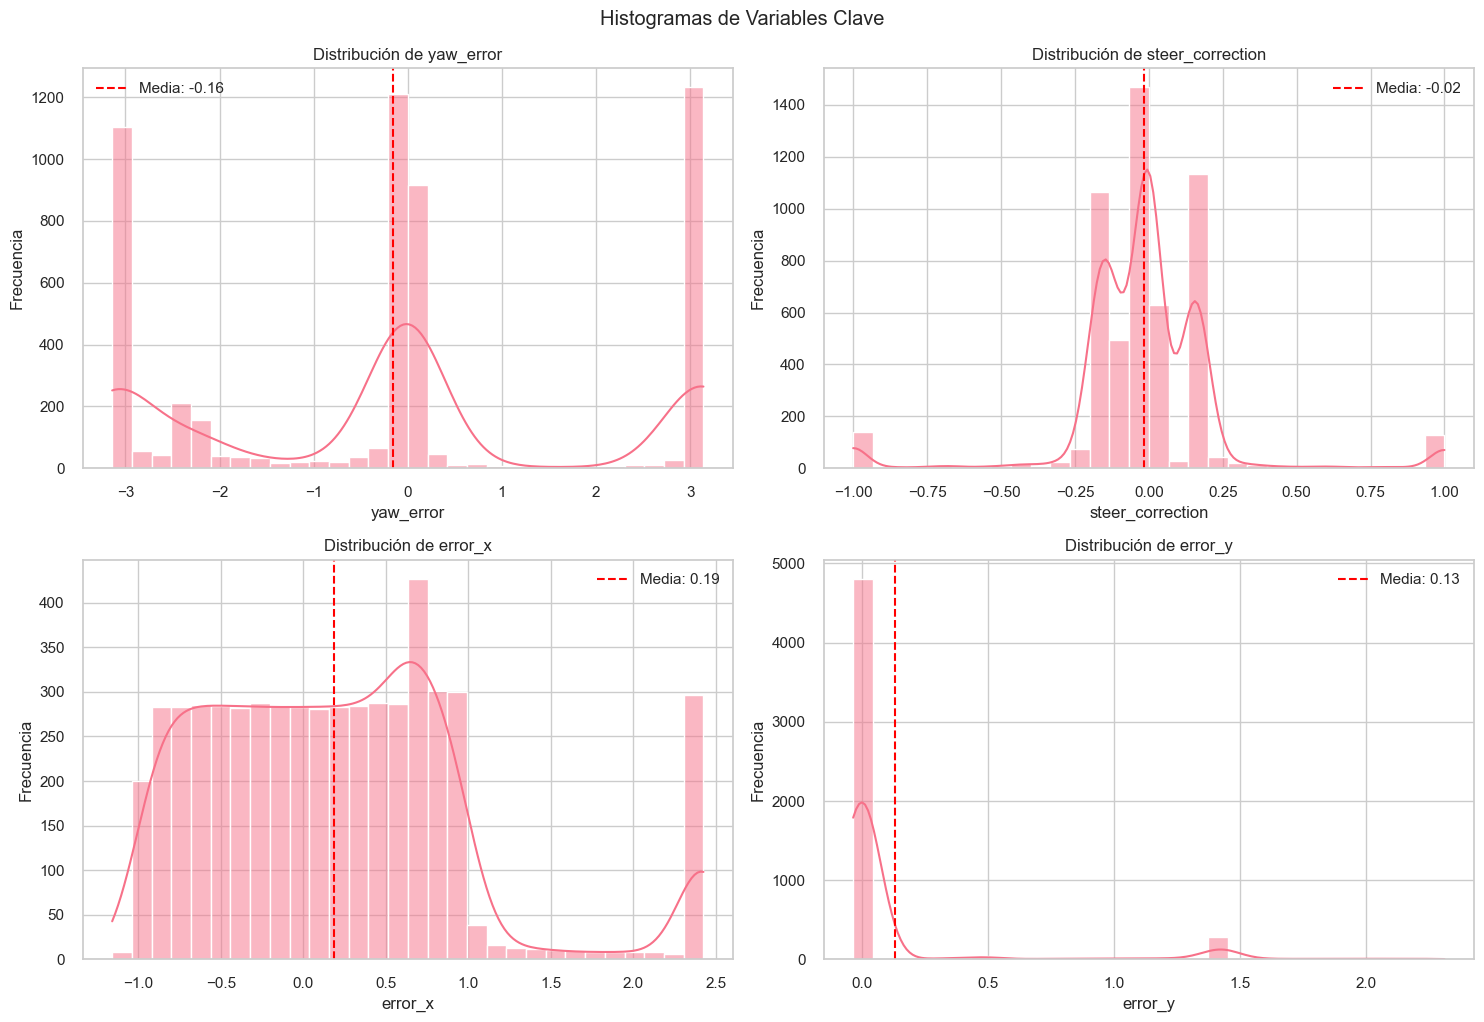

In [20]:
# Variables numéricas clave
numeric_vars = ['yaw_error', 'steer_correction', 'error_x', 'error_y']

# Crear histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    # Usando seaborn histplot
    sns.histplot(data=data, x=var, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    
    # Añadir línea de media
    mean_val = data[var].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', 
                   label=f'Media: {mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Histogramas de Variables Clave', y=1.02)
plt.show()

### 2. Diagramas de Densidad (KDE)

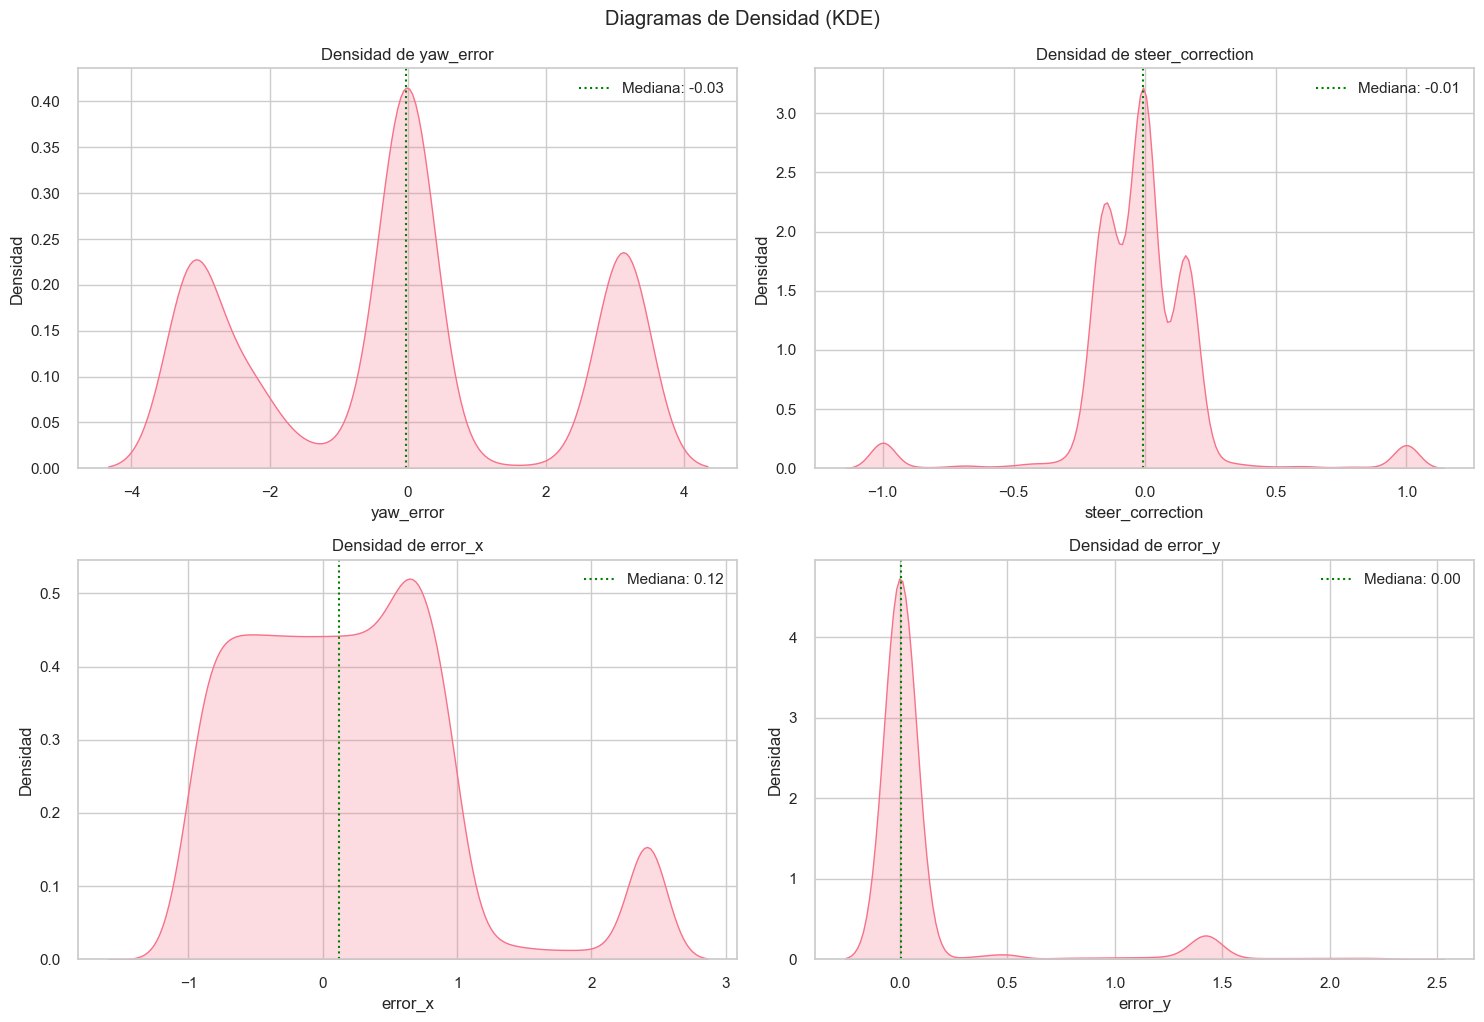

In [21]:
# Crear KDE plots para las mismas variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    # Usando seaborn kdeplot
    sns.kdeplot(data=data, x=var, ax=axes[i], fill=True)
    axes[i].set_title(f'Densidad de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    
    # Añadir líneas de estadísticos importantes
    median_val = data[var].median()
    axes[i].axvline(median_val, color='green', linestyle=':', 
                   label=f'Mediana: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Diagramas de Densidad (KDE)', y=1.02)
plt.show()

### 3. Diagramas de Caja para Detección de Outliers

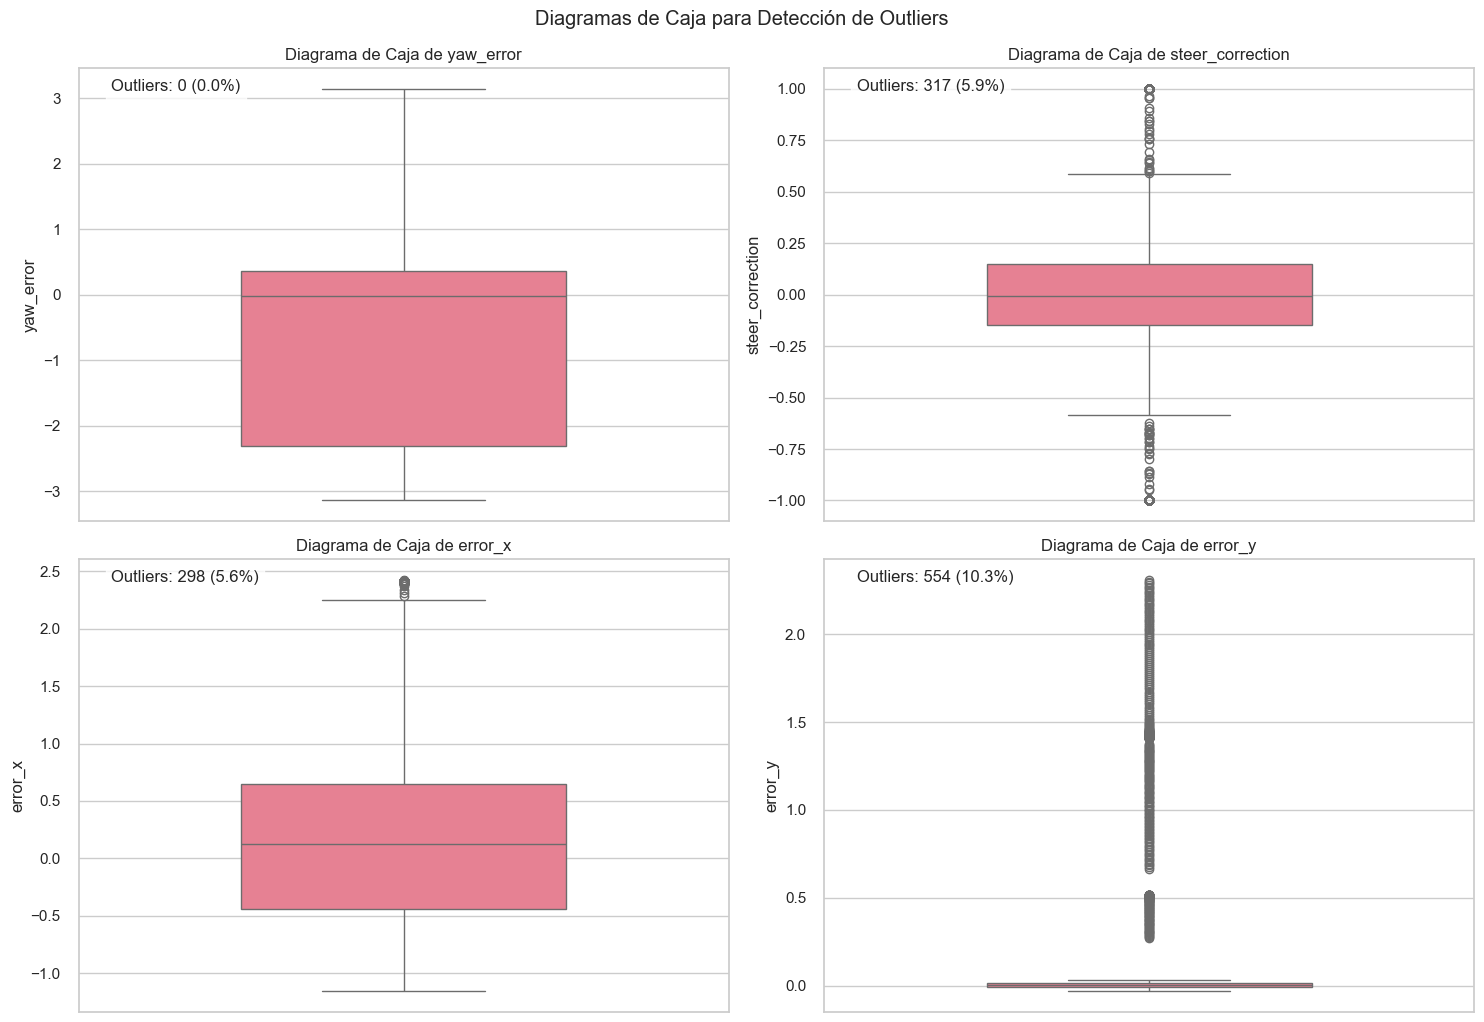

In [22]:
# Crear boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    # Usando seaborn boxplot
    sns.boxplot(data=data, y=var, ax=axes[i], width=0.5)
    axes[i].set_title(f'Diagrama de Caja de {var}')
    axes[i].set_ylabel(var)
    
    # Calcular y mostrar outliers
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    
    axes[i].text(0.05, 0.95, 
                f'Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)',
                transform=axes[i].transAxes, 
                bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Diagramas de Caja para Detección de Outliers', y=1.02)
plt.show()

### Interpretación de los Resultados
- Histogramas:
Revelarán la distribución de frecuencia de cada variable
Mostrarán si los datos están sesgados o tienen múltiples modas

- Diagramas de Densidad (KDE):
Proporcionarán una visión más suave de la distribución
Útiles para identificar múltiples picos (multimodalidad)

- Diagramas de Caja:
Identificarán visualmente outliers
Mostrarán la dispersión y simetría de los datos
La caja muestra el rango intercuartílico (IQR)
Los bigotes muestran el rango de datos "normales"

- Gráficos Adicionales:

El scatter plot revelará relaciones entre variables
Los boxplots agrupados mostrarán cómo varía el error en diferentes condiciones de control

### Relación entre variables
- Diagramas de dispersión (sns.scatterplot, sns.pairplot)
- Diagramas de violín (sns.violinplot)
- Mapas de calor de correlación (sns.heatmap)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Seleccionar solo las variables numéricas relevantes
numeric_vars = ['Kp', 'Ki', 'Kd', 'yaw_error', 'steer_correction', 
               'error_x', 'error_y', 'target_y', 'vehicle_y', 
               'target_x', 'vehicle_x']

data_numeric = data[numeric_vars]

### 1. Diagramas de Dispersión (Scatter Plots)

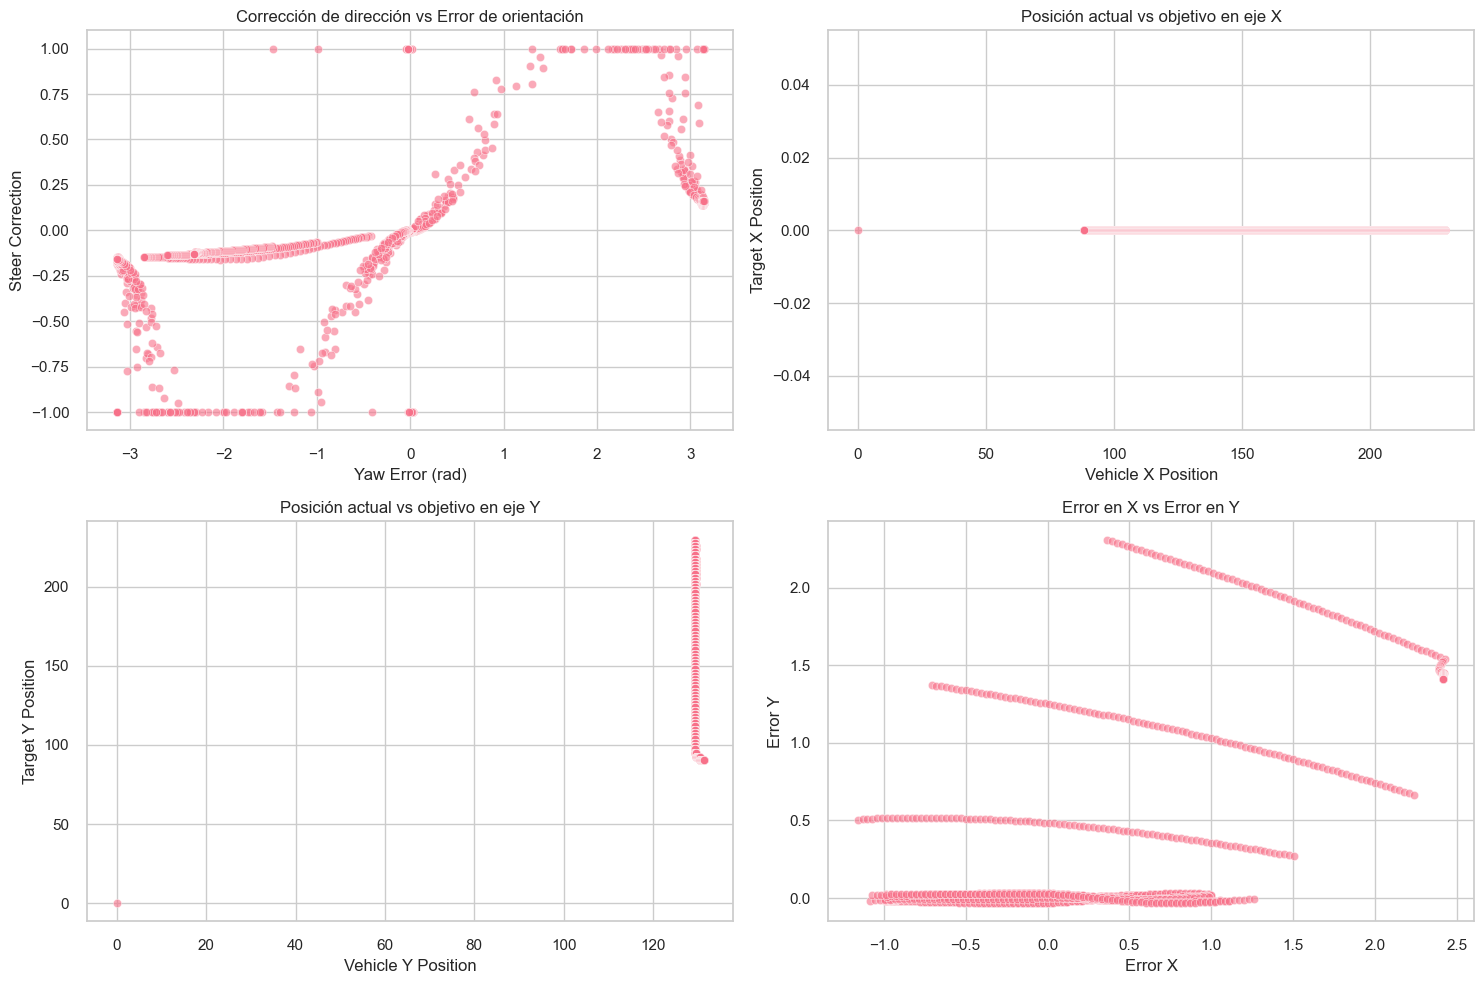

In [24]:
# Gráficos de dispersión para relaciones clave
plt.figure(figsize=(15, 10))

# Relación entre error de orientación y corrección de dirección
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='yaw_error', y='steer_correction', alpha=0.6)
plt.title('Corrección de dirección vs Error de orientación')
plt.xlabel('Yaw Error (rad)')
plt.ylabel('Steer Correction')

# Relación entre posición actual y posición objetivo en X
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='vehicle_x', y='target_x', alpha=0.6)
plt.title('Posición actual vs objetivo en eje X')
plt.xlabel('Vehicle X Position')
plt.ylabel('Target X Position')

# Relación entre posición actual y posición objetivo en Y
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='vehicle_y', y='target_y', alpha=0.6)
plt.title('Posición actual vs objetivo en eje Y')
plt.xlabel('Vehicle Y Position')
plt.ylabel('Target Y Position')

# Relación entre errores en X e Y
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='error_x', y='error_y', alpha=0.6)
plt.title('Error en X vs Error en Y')
plt.xlabel('Error X')
plt.ylabel('Error Y')

plt.tight_layout()
plt.show()

### 2. Pair Plot (Análisis Multivariable)

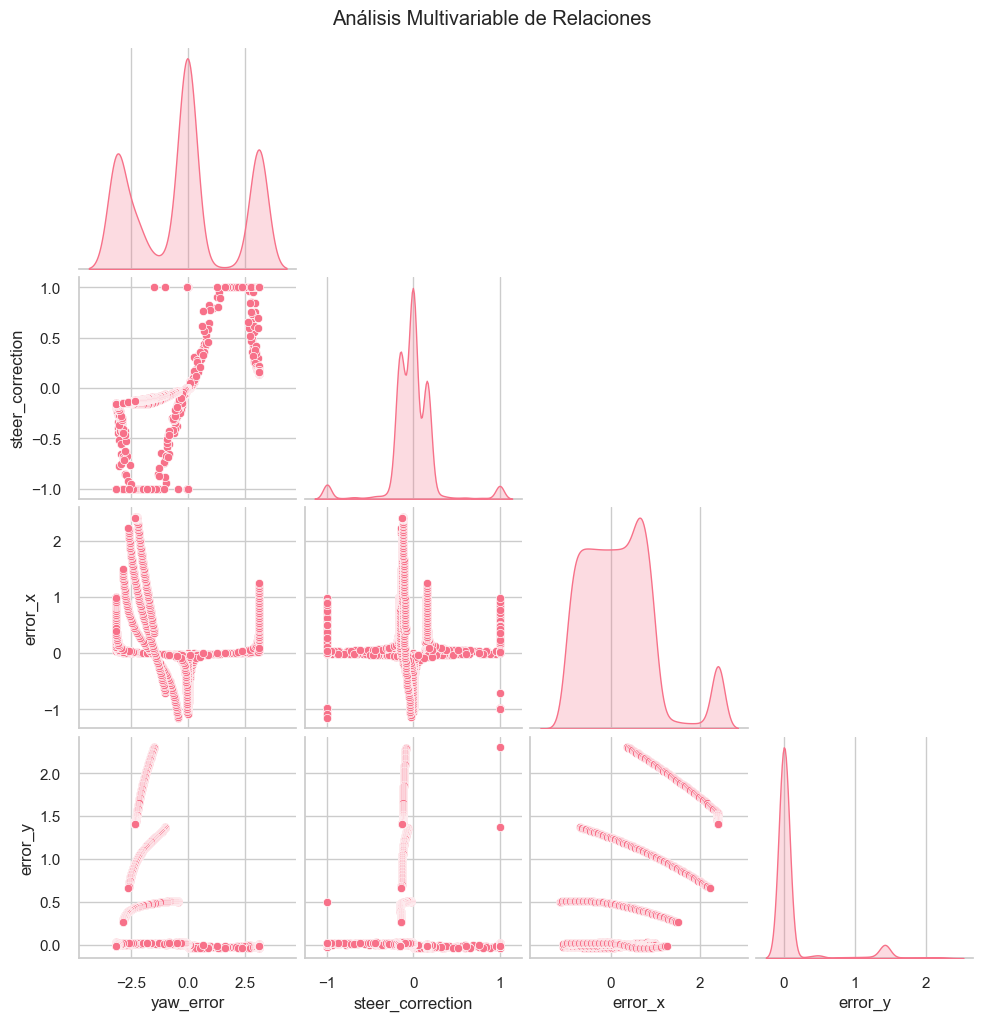

In [25]:
# Pair plot para las variables más importantes
pair_vars = ['yaw_error', 'steer_correction', 'error_x', 'error_y']
sns.pairplot(data[pair_vars], corner=True, diag_kind='kde')
plt.suptitle('Análisis Multivariable de Relaciones', y=1.02)
plt.show()

### 3. Diagramas de Violín

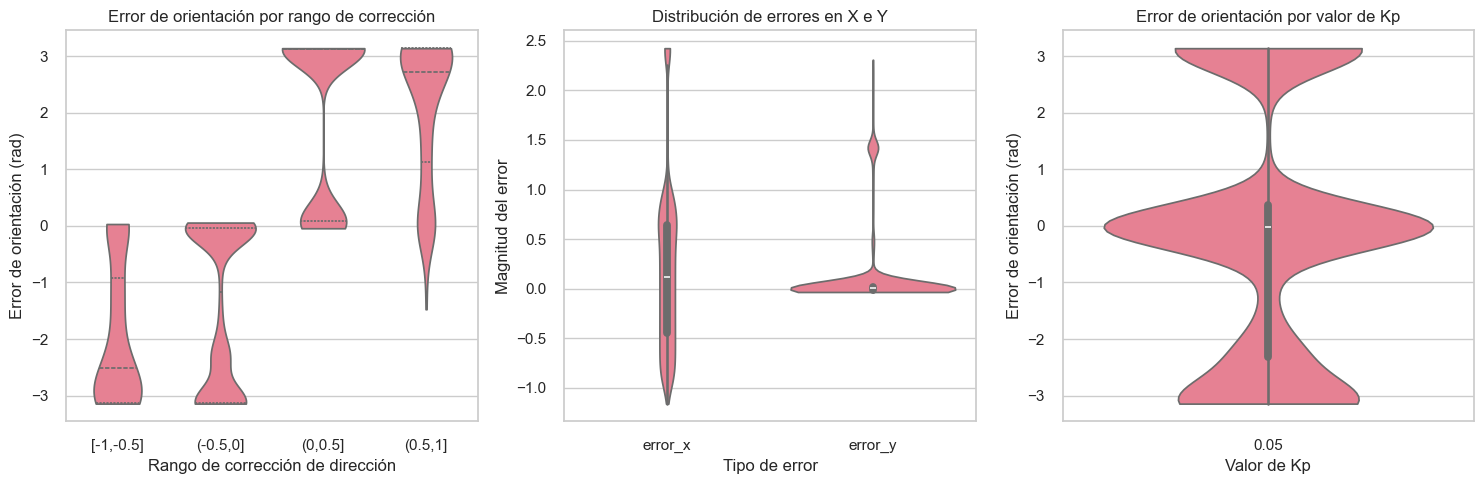

In [26]:
# Primero creamos la columna 'steer_group' si no existe
if 'steer_group' not in data.columns:
    data['steer_group'] = pd.cut(data['steer_correction'], 
                                bins=[-1.1, -0.5, 0, 0.5, 1.1],
                                labels=['[-1,-0.5]', '(-0.5,0]', '(0,0.5]', '(0.5,1]'])

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 5))

# 1. Distribución del error de orientación por rango de corrección
plt.subplot(1, 3, 1)
sns.violinplot(data=data, x='steer_group', y='yaw_error', cut=0, inner='quartile')
plt.title('Error de orientación por rango de corrección')
plt.xlabel('Rango de corrección de dirección')
plt.ylabel('Error de orientación (rad)')

# 2. Distribución de errores en X e Y (usando melt para transformar los datos)
plt.subplot(1, 3, 2)
error_data = data.melt(value_vars=['error_x', 'error_y'], 
                      var_name='tipo_error', 
                      value_name='valor_error')
sns.violinplot(data=error_data, x='tipo_error', y='valor_error', cut=0)
plt.title('Distribución de errores en X e Y')
plt.xlabel('Tipo de error')
plt.ylabel('Magnitud del error')

# 3. Distribución del error por valor de Kp (agrupando Kp si hay muchos valores únicos)
if data['Kp'].nunique() > 5:  # Si hay muchos valores únicos, los agrupamos
    data['Kp_group'] = pd.cut(data['Kp'], bins=5)
    x_var = 'Kp_group'
else:
    x_var = 'Kp'

plt.subplot(1, 3, 3)
sns.violinplot(data=data, x=x_var, y='yaw_error', cut=0)
plt.title('Error de orientación por valor de Kp')
plt.xlabel('Valor de Kp')
plt.ylabel('Error de orientación (rad)')

plt.tight_layout()
plt.show()

### 4. Mapa de Calor de Correlaciones

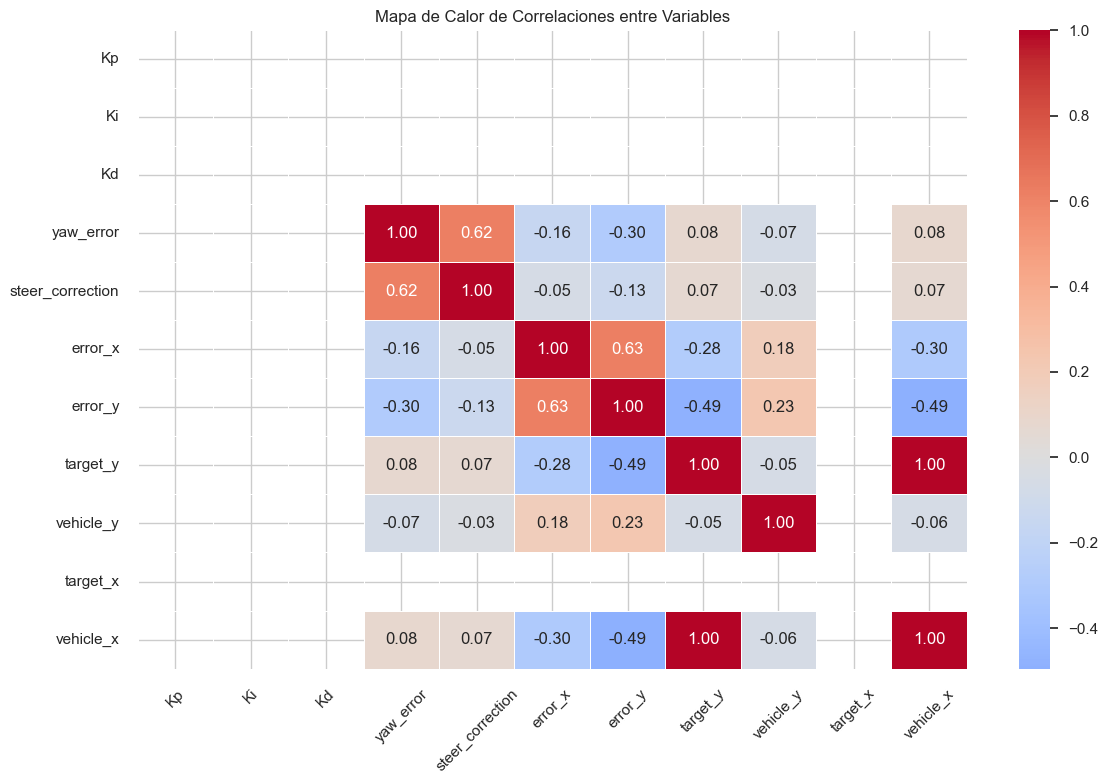

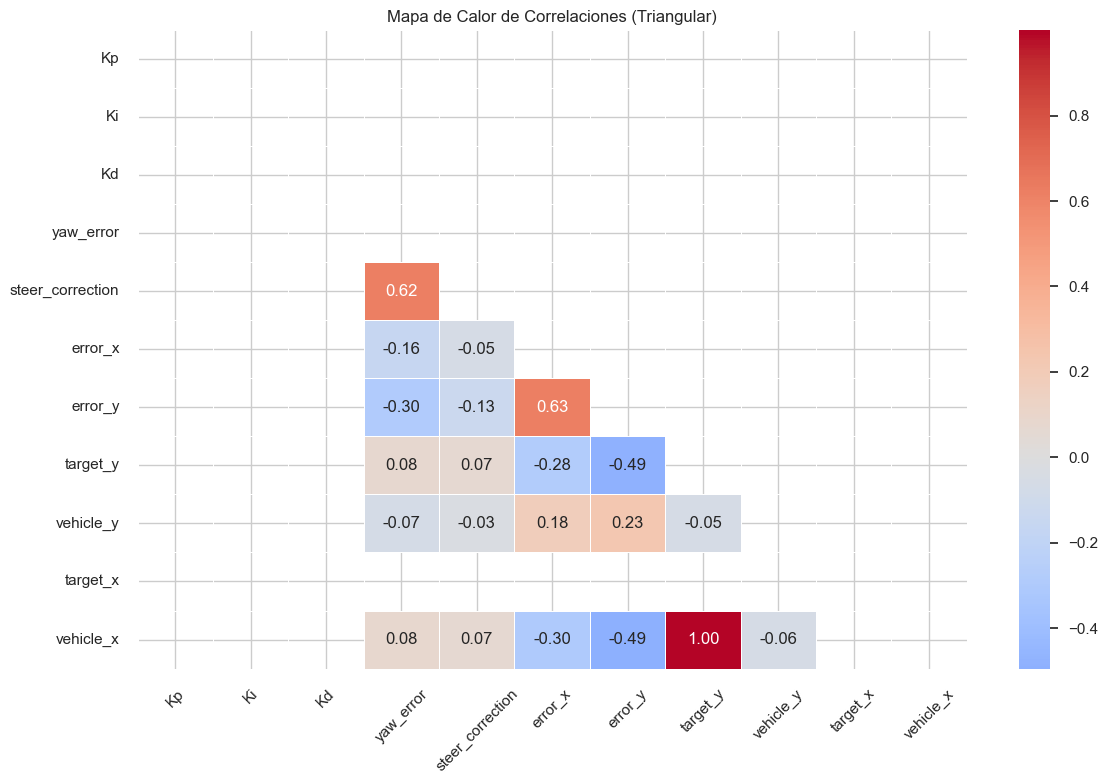

In [27]:
# Matriz de correlación
corr_matrix = data_numeric.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Versión con máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
           center=0, fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (Triangular)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Interpretación de los Resultados

- Scatter Plots:
Revelan relaciones no lineales entre variables
Muestran agrupamientos o patrones en los datos
Permiten identificar valores atípicos multivariados

- Pair Plot:
Proporciona una visión general de todas las relaciones por pares
Los gráficos diagonales muestran distribuciones univariadas
Útil para detectar relaciones complejas entre múltiples variables

- Violin Plots:
Combinan información de boxplot con estimación de densidad
Muestran la distribución completa de los datos en diferentes condiciones
Revelan multimodalidad en las distribuciones condicionales

- Heatmaps:
Visualizan la matriz de correlación de forma intuitiva
Los colores indican fuerza y dirección de las correlaciones
Permite identificar rápidamente las relaciones más fuertes

### Análisis de variables categóricas
- Gráficos de barras (sns.countplot)
- Gráficos de pastel (plt.pie)

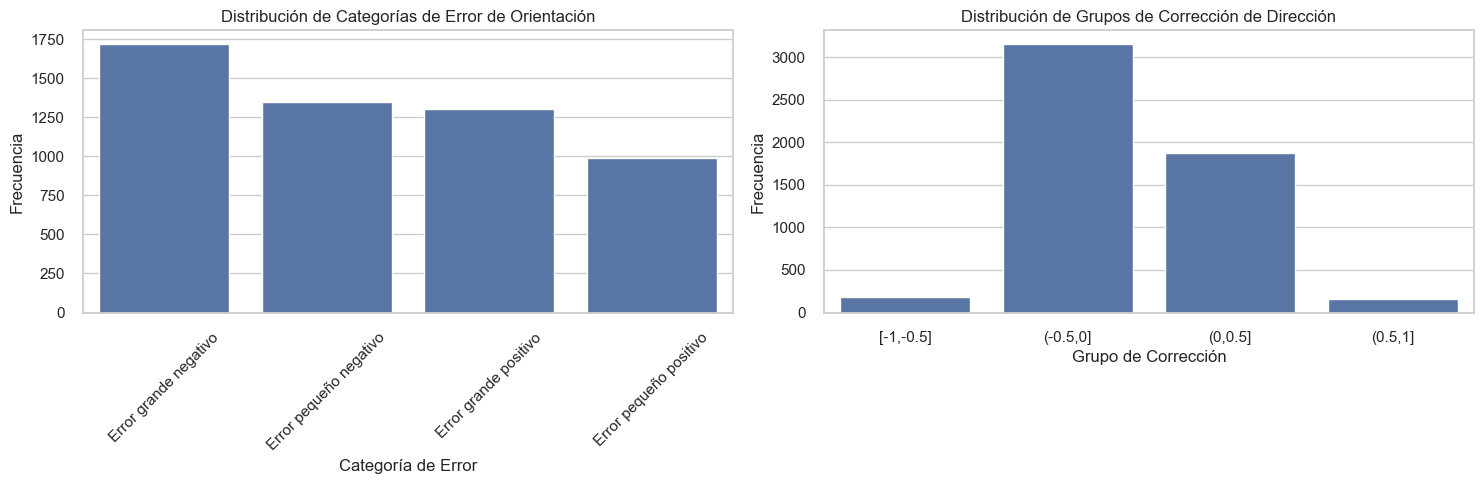

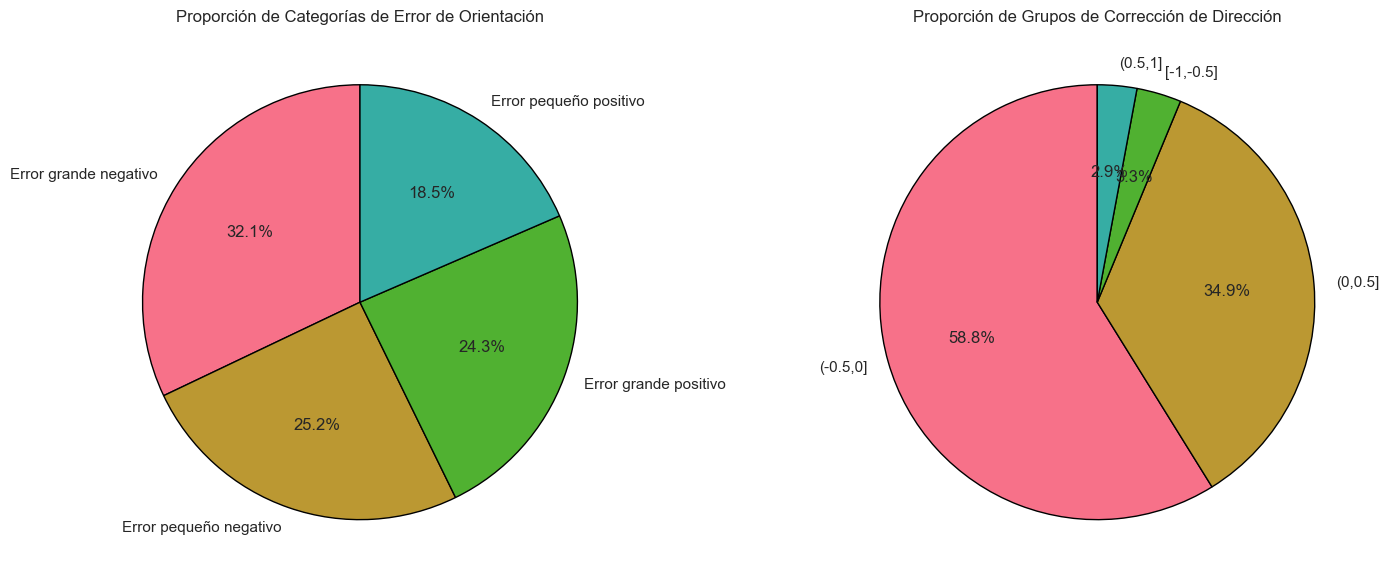

Tabla de contingencia entre categorías de error y grupos de corrección:
steer_group             [-1,-0.5]  (-0.5,0]  (0,0.5]  (0.5,1]
yaw_error_category                                           
Error grande negativo         128      1591        0        1
Error pequeño negativo         27      1261       41       21
Error pequeño positivo         23       304      648       17
Error grande positivo           0         0     1183      118


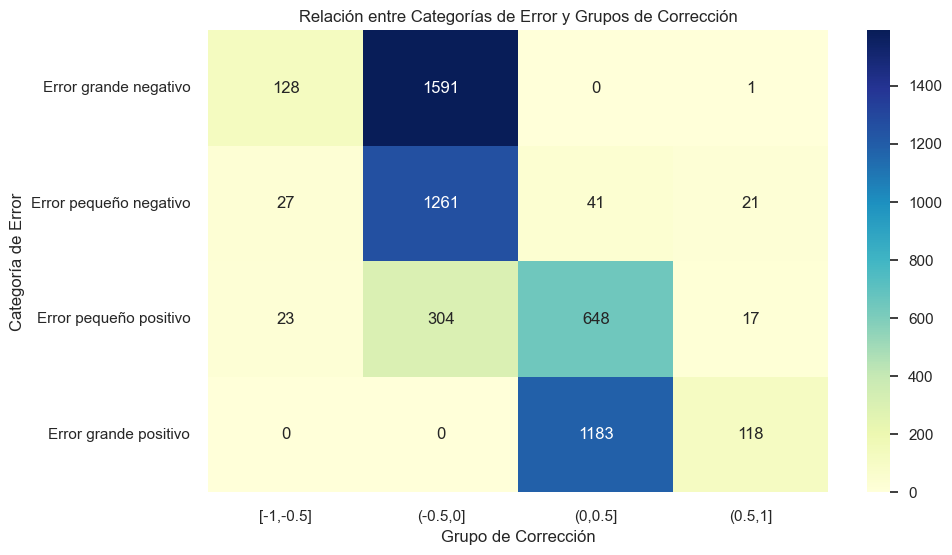

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# 1. Gráficos de Barras (Countplots)

# Crear categorías para el error de orientación
data['yaw_error_category'] = pd.cut(data['yaw_error'],
                                  bins=[-3.5, -1, 0, 1, 3.5],
                                  labels=['Error grande negativo', 'Error pequeño negativo', 
                                          'Error pequeño positivo', 'Error grande positivo'])

plt.figure(figsize=(15, 5))

# Countplot para categorías de error de orientación
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='yaw_error_category', order=data['yaw_error_category'].value_counts().index)
plt.title('Distribución de Categorías de Error de Orientación')
plt.xlabel('Categoría de Error')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Countplot para grupos de corrección de dirección
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='steer_group', order=['[-1,-0.5]', '(-0.5,0]', '(0,0.5]', '(0.5,1]'])
plt.title('Distribución de Grupos de Corrección de Dirección')
plt.xlabel('Grupo de Corrección')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Gráficos de Pastel (Pie Charts)

# Preparamos los datos para los gráficos de pastel
error_counts = data['yaw_error_category'].value_counts()
steer_counts = data['steer_group'].value_counts()

plt.figure(figsize=(15, 6))

# Pie chart para categorías de error de orientación
plt.subplot(1, 2, 1)
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('husl'), wedgeprops={'edgecolor': 'black'})
plt.title('Proporción de Categorías de Error de Orientación')

# Pie chart para grupos de corrección de dirección
plt.subplot(1, 2, 2)
plt.pie(steer_counts, labels=steer_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('husl'), wedgeprops={'edgecolor': 'black'})
plt.title('Proporción de Grupos de Corrección de Dirección')

plt.tight_layout()
plt.show()

# 3. Análisis cruzado entre categorías

# Tabla de contingencia
cross_tab = pd.crosstab(data['yaw_error_category'], data['steer_group'])
print("Tabla de contingencia entre categorías de error y grupos de corrección:")
print(cross_tab)

# Heatmap de la tabla de contingencia
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Categorías de Error y Grupos de Corrección')
plt.xlabel('Grupo de Corrección')
plt.ylabel('Categoría de Error')
plt.show()

### Explicación de las mejoras:

- Creación de categorías significativas:
Convertimos el error de orientación continuo en categorías discretas
Agrupamos la corrección de dirección en rangos definidos

- Gráficos de barras (Countplots):
Ordenamos las categorías por frecuencia para mejor visualización
Añadimos títulos y etiquetas descriptivas
Rotamos las etiquetas del eje x para mejor legibilidad

- Gráficos de pastel:
Usamos la paleta de colores 'husl' para mejor distinción
Añadimos porcentajes con 1 decimal de precisión
Incluimos bordes negros para mejor definición de los segmentos

- Análisis cruzado:
Creamos una tabla de contingencia para ver relaciones entre categorías
Visualizamos con un heatmap para identificar patrones

### Análisis de Series Temporales para el Vehículo Autónomo

## Análisis:

- Gráficos de Líneas:
Visualizan la evolución temporal de variables clave
Error de orientación (yaw_error) muestra el desempeño del controlador
Corrección de dirección (steer_correction) muestra las acciones del sistema
Error de posición combina errores en X e Y

- Descomposición Temporal:
Divide la serie en: Tendencia, Estacionalidad y Residual
Modelo aditivo: Y(t) = Tendencia + Estacionalidad + Residual
Periodo de 50 puntos (5 segundos con resampleo de 100ms)

- Autocorrelación:
ACF muestra correlación con valores pasados
PACF muestra correlación directa (eliminando intermediarios)
Útil para identificar patrones repetitivos

- Media Móvil:
Suaviza la serie para identificar tendencias
Ventana de 20 puntos (2 segundos con resampleo de 100ms)

### Recomendaciones:

- Para control adaptativo, considerar modelos ARIMA basados en ACF/PACF
- Analizar los residuos para detectar anomalías temporales
- Comparar patrones en diferentes modos de operación
- Si existe estacionalidad, ajustar parámetros PID cíclicamente

# Control Adaptativo 

El control adaptativo aplicado a un controlador PID en un vehículo autónomo consiste en ajustar dinámicamente los parámetros del controlador PID (Proporcional, Integral, Derivativo) en tiempo real, para mantener un rendimiento óptimo frente a cambios en el entorno, la dinámica del vehículo o las condiciones de operación.

### Técnicas comunes de adaptación
- MRAC (Model Reference Adaptive Control): compara el comportamiento del sistema con un modelo de referencia.
- LMS (Least Mean Squares): minimiza el error cuadrático medio.
- Algoritmos basados en IA: redes neuronales o lógica difusa para ajustar los parámetros PID.

### Análisis del Conjunto de Datos y Explicación Contextualizada

El archivo CSV adjunto contiene registros temporales de un sistema de control PID aplicado a un vehículo autónomo o asistido. A continuación, se contextualizan los puntos mencionados con los datos proporcionados:

---

####  **1. Dirección (Steering)**
- **Datos relevantes**:  
  - `yaw_error`: Error de orientación (diferencia entre la dirección deseada y la actual).  
  - `steer_correction`: Corrección aplicada al volante (salida del controlador PID).  
  - `Kp`, `Ki`, `Kd`: Parámetros del PID (constantes en este registro, pero podrían adaptarse).  

- **Ejemplo en los datos**:  
  - En `11:22:47.319`, el `yaw_error` es `0.9558`, lo que genera una corrección máxima (`steer_correction = 1.0`).  
  - En `11:22:47.431`, el error salta a `-3.1416` (equivalente a ±π, indicando un cambio brusco de dirección), y la corrección se satura a `-1.0`.  

- **Adaptación sugerida**:  
  - Si el vehículo entra en una curva cerrada (error alto), aumentar `Kd` (como se menciona) para amortiguar oscilaciones. En los datos, `Kd` se mantiene fijo (`0.02`), pero un sistema adaptativo podría ajustarlo dinámicamente.

---

####  **2. Aceleración**
- **Datos relevantes**:  
  - `acelerador`: Valor de aceleración (constante en `0.5` en los datos).  
  - `error_x`, `error_y`: Errores de posición respecto al objetivo.  

- **Ejemplo de adaptación**:  
  - Aunque el dataset no muestra cambios en la aceleración, un sistema adaptativo podría ajustar `Kp` y `Ki` si el vehículo sube una pendiente (detectada por sensores de inclinación). Por ejemplo, aumentar `Kp` para compensar la gravedad.  

---

####  **3. Frenado**
- **Datos relevantes**:  
  - `brake`: Siempre `0` en este registro (no se activa el frenado).  
  - `error_x` y `error_y`: Podrían usarse para frenado adaptativo (ejemplo: si el error disminuye rápidamente, activar frenos).  

- **Ejemplo de adaptación**:  
  - En superficies resbaladizas, reducir `Kp` (como se sugiere) para evitar deslizamientos. Los datos no muestran frenado, pero un sistema real usaría LIDAR/radar para ajustar parámetros.  

---

####  **Integración en Tiempo Real**
- **Observaciones en los datos**:  
  - El PID parece fijo (`Kp=0.05`, `Ki=0.001`, `Kd=0.02`), pero un sistema adaptativo usaría:  
    - **Filtros de Kalman**: Para estimar estados no medidos directamente (ejemplo: velocidad lateral).  
    - **Aprendizaje por refuerzo**: Para optimizar `Kp/Ki/Kd` basado en historial de errores (en los datos, el error `yaw_error` oscila alrededor de `±3.1416`, sugiriendo posibles sobrecorrecciones).  

- **Ejemplo de mejora**:  
  - En `11:22:48.502`, el `yaw_error` cambia de `-3.1416` a `+3.1416`, indicando un posible "sobrepaso" (overshoot). Un PID adaptativo reduciría `Kp` o aumentaría `Kd` aquí.  

---

### Conclusiones
- **Limitaciones en los datos**:  
  - Los parámetros PID son estáticos (no adaptativos).  
  - No hay registro de frenado o cambios en aceleración.  
- **Oportunidades de mejora**:  
  - Implementar MRAC o redes neuronales para ajustar `Kp/Ki/Kd` en tiempo real.  
  - Usar fusión de sensores (ejemplo: LIDAR) para ajustar frenado en curvas.  

El dataset muestra un escenario básico de control PID, pero resalta la necesidad de adaptabilidad para manejar cambios bruscos (como el error de ±π) o condiciones dinámicas (pendientes, superficies resbaladizas).


### Integración en tiempo real

1. Filtros de Kalman para estimar estados ocultos.
2. Algoritmos de optimización online para ajustar parámetros PID.
3. Aprendizaje por refuerzo para mejorar decisiones de control con experiencia.


## Control PID con NN

La siguiente PoC implementa un Control Adaptativo en un Controlador PID mediante Redes Neuronales (NN)

In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Definir la Red Neuronal (Entrada: error y derivada del error | Salida: Kp, Ki, Kd)
class PIDAdaptiveNN(nn.Module):
    def __init__(self):
        super(PIDAdaptiveNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # Capa oculta 1 (2 entradas: error y derivada)
        self.fc2 = nn.Linear(16, 3)   # Capa de salida (3 salidas: Kp, Ki, Kd)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()    # Para normalizar salidas entre 0 y 1

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))  # Kp, Ki, Kd en rango [0, 1] (luego escalamos)
        return x * 0.1  # Escalar a valores razonables (ej: Kp ∈ [0, 0.1])

# 2. Simulación del Control PID Adaptativo
def adaptive_pid_control():
    # Inicializar red neuronal y optimizador
    model = PIDAdaptiveNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()  # Función de pérdida (error cuadrático medio)

    # Simulación de datos (ejemplo: error oscilante)
    time_steps = 1000
    yaw_errors = np.sin(np.linspace(0, 10, time_steps)) * 3.0  # Error tipo senoidal

    # Bucle de control
    for t in range(1, time_steps):
        error = yaw_errors[t]
        error_derivative = yaw_errors[t] - yaw_errors[t-1]  # Derivada aproximada

        # Entrada a la red neuronal
        state = torch.FloatTensor([error, error_derivative])
        kp, ki, kd = model(state)

        # Control PID clásico (usando los nuevos Kp, Ki, Kd)
        pid_output = kp * error + ki * (error + yaw_errors[t-1]) + kd * error_derivative

        # Entrenamiento (simulado: queremos reducir el error)
        target_output = torch.FloatTensor([0.0])  # Objetivo: error → 0
        loss = criterion(pid_output, target_output)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Monitoreo
        if t % 100 == 0:
            print(f"Step {t}: Error={error:.3f}, Kp={kp.item():.4f}, Ki={ki.item():.4f}, Kd={kd.item():.4f}")

adaptive_pid_control()

Step 100: Error=2.526, Kp=0.0075, Ki=0.0221, Kd=0.0235
Step 200: Error=2.725, Kp=0.0024, Ki=0.0073, Kd=0.0151
Step 300: Error=0.414, Kp=0.0156, Ki=0.0251, Kd=0.0380
Step 400: Error=-2.278, Kp=0.0045, Ki=0.0055, Kd=0.0166
Step 500: Error=-2.872, Kp=0.0011, Ki=0.0015, Kd=0.0078
Step 600: Error=-0.821, Kp=0.0066, Ki=0.0082, Kd=0.0250
Step 700: Error=1.987, Kp=0.0022, Ki=0.0062, Kd=0.0192
Step 800: Error=2.964, Kp=0.0005, Ki=0.0020, Kd=0.0094
Step 900: Error=1.212, Kp=0.0038, Ki=0.0088, Kd=0.0233


Resumen estadístico:
                           timestamp            Kp            Ki  \
count                           5364  5.364000e+03  5.364000e+03   
mean   2025-02-07 12:18:54.156986112  5.000000e-02  1.000000e-03   
min       2025-02-07 12:18:02.604000  5.000000e-02  1.000000e-03   
25%    2025-02-07 12:18:28.502500096  5.000000e-02  1.000000e-03   
50%    2025-02-07 12:18:54.076500224  5.000000e-02  1.000000e-03   
75%    2025-02-07 12:19:19.967750144  5.000000e-02  1.000000e-03   
max       2025-02-07 12:19:45.359000  5.000000e-02  1.000000e-03   
std                              NaN  1.387908e-17  2.168606e-19   

                 Kd    yaw_error  steer_correction  acelerador   brake  \
count  5.364000e+03  5364.000000       5364.000000      5364.0  5364.0   
mean   2.000000e-02    -0.155850         -0.016211         0.5     0.0   
min    2.000000e-02    -3.141591         -1.000000         0.5     0.0   
25%    2.000000e-02    -2.308892         -0.145464         0.5     0.0

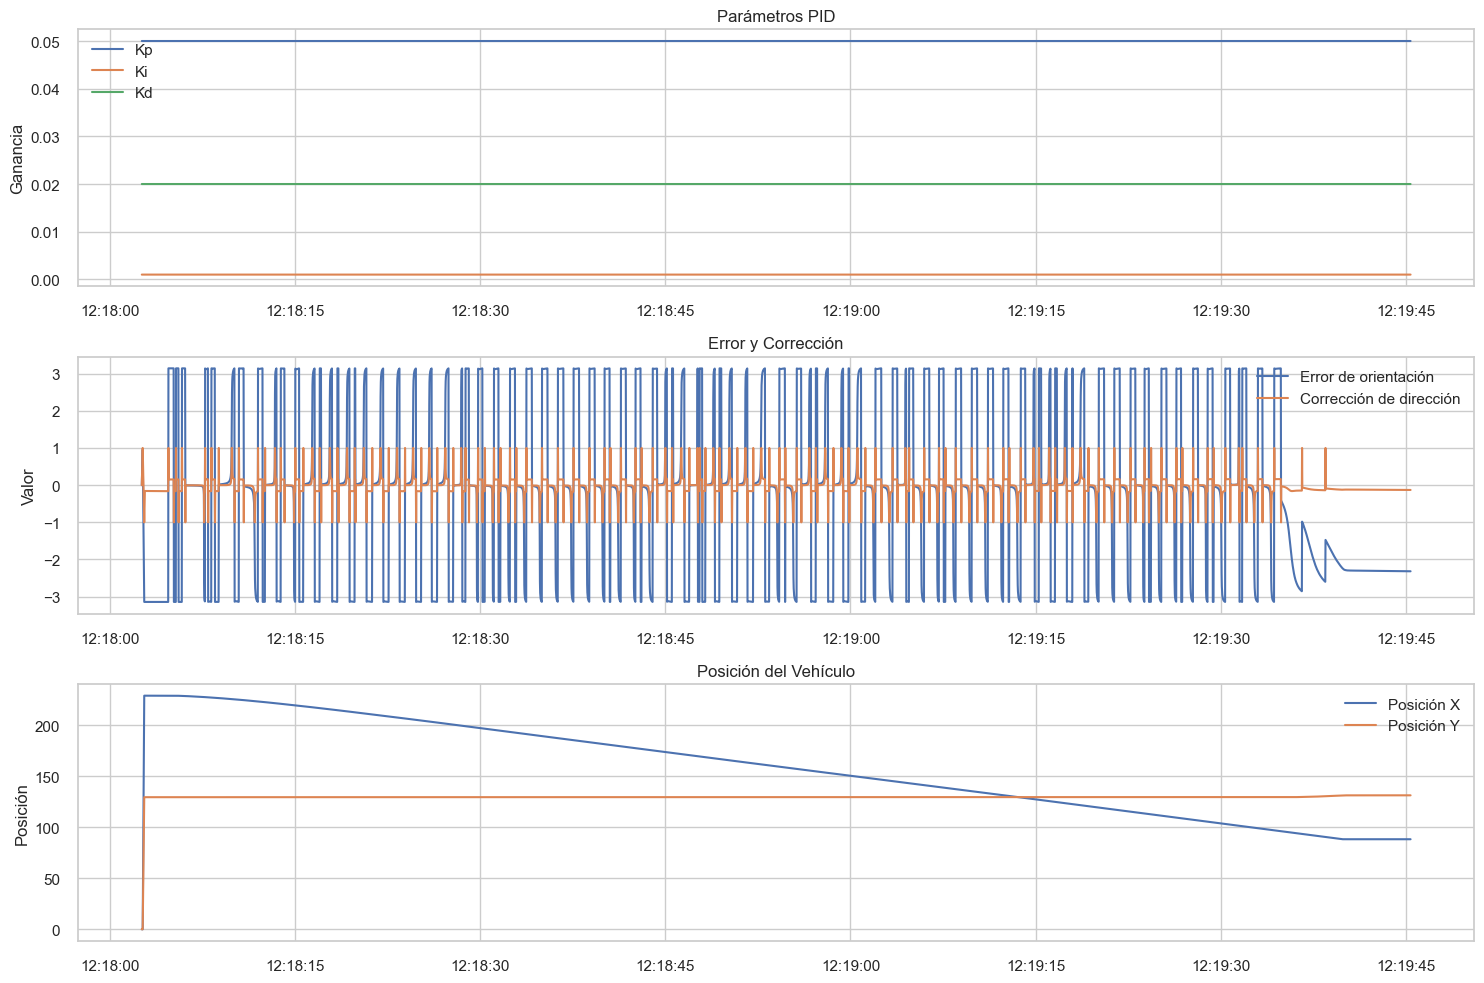


Porcentaje de tiempo en saturación: 4.90%
Error RMS de orientación: 2.2175 rad

Recomendaciones:
- Aumentar ganancia Kd para mejorar amortiguación de oscilaciones
- Ajustar ganancia Ki para mejorar corrección de error estacionario


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
df = pd.read_csv(_name_of_log)

# Convertir timestamp a datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Análisis básico
print("Resumen estadístico:")
print(df.describe())

# Visualización de parámetros PID y errores
plt.figure(figsize=(15, 10))

# 1. Parámetros PID
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['Kp'], label='Kp')
plt.plot(df['timestamp'], df['Ki'], label='Ki')
plt.plot(df['timestamp'], df['Kd'], label='Kd')
plt.title('Parámetros PID')
plt.ylabel('Ganancia')
plt.legend()

# 2. Error de orientación y corrección
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['yaw_error'], label='Error de orientación')
plt.plot(df['timestamp'], df['steer_correction'], label='Corrección de dirección')
plt.title('Error y Corrección')
plt.ylabel('Valor')
plt.legend()

# 3. Posiciones del vehículo
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['vehicle_x'], label='Posición X')
plt.plot(df['timestamp'], df['vehicle_y'], label='Posición Y')
plt.title('Posición del Vehículo')
plt.ylabel('Posición')
plt.legend()

plt.tight_layout()
plt.show()

# Análisis de saturación
saturation_percentage = (len(df[abs(df['steer_correction']) == 1.0]) / len(df)) * 100
print(f"\nPorcentaje de tiempo en saturación: {saturation_percentage:.2f}%")

# Análisis de error RMS
yaw_error_rms = np.sqrt(np.mean(df['yaw_error']**2))
print(f"Error RMS de orientación: {yaw_error_rms:.4f} rad")

# Recomendaciones de ajuste basadas en análisis
print("\nRecomendaciones:")
if saturation_percentage > 10:
    print("- Reducir ganancia Kp para evitar saturación frecuente")
if yaw_error_rms > 1.0:
    print("- Aumentar ganancia Kd para mejorar amortiguación de oscilaciones")
if df['yaw_error'].abs().mean() > 0.5:
    print("- Ajustar ganancia Ki para mejorar corrección de error estacionario")

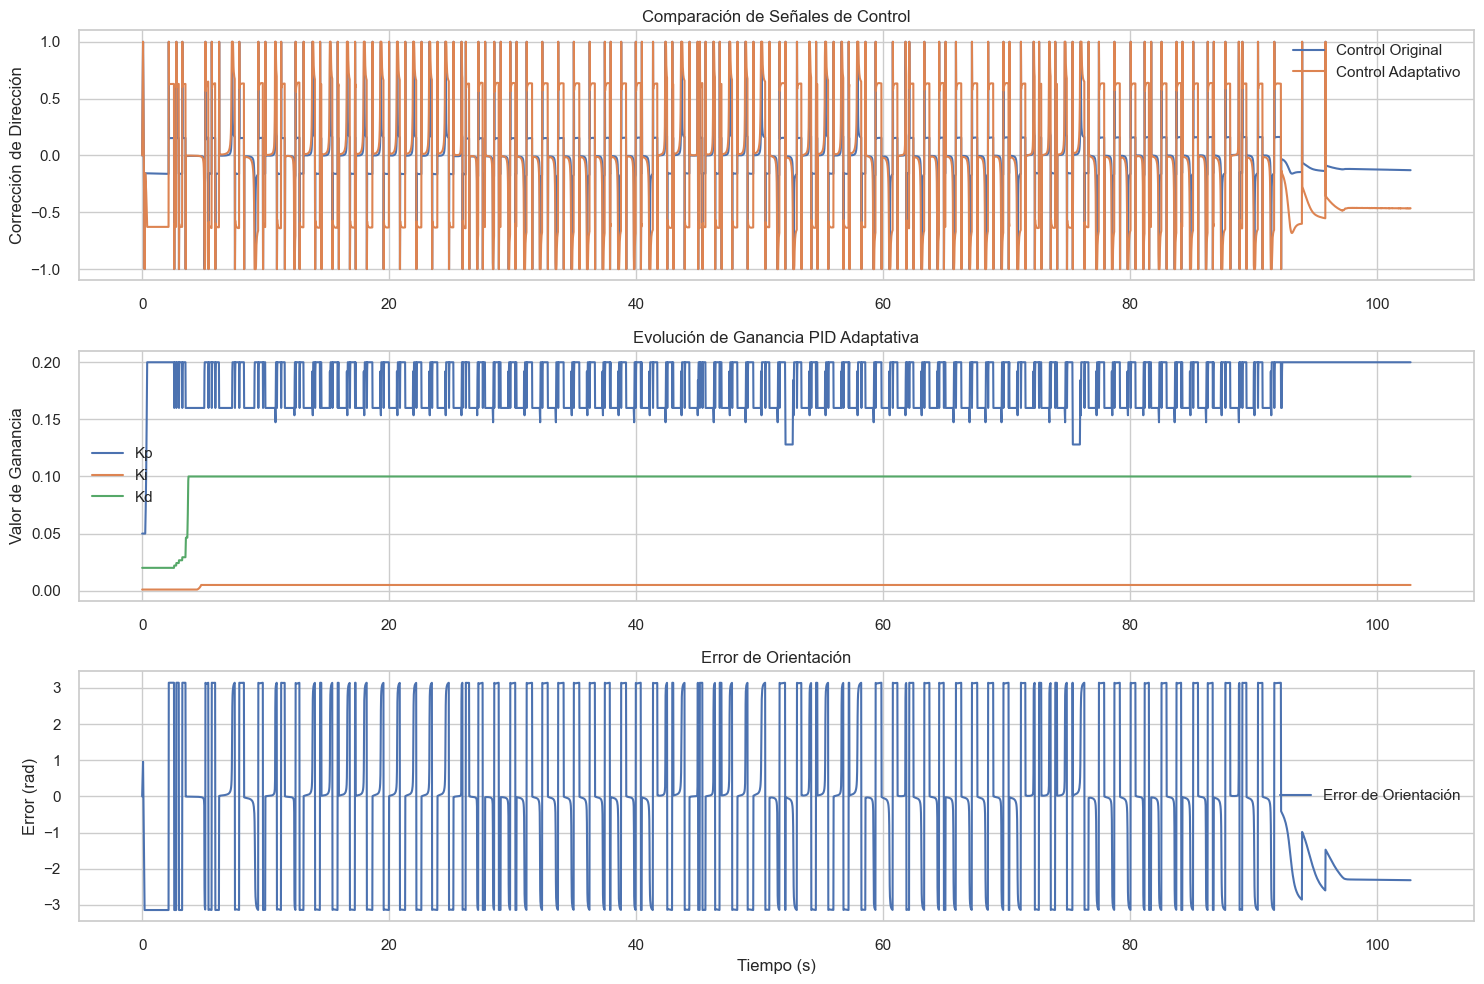


Análisis de Rendimiento:
RMSE Error (Original): 2.2175
RMSE Error (Adaptativo): 2.2175
Varianza Control (Original): 0.0711
Varianza Control (Adaptativo): 0.2870

Mejora en RMSE: 0.00%


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import signal

import warnings

# Configurar warnings para ignorar las advertencias específicas
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

class AdaptivePIDController:
    def __init__(self, initial_Kp=0.05, initial_Ki=0.001, initial_Kd=0.02):
        # Parámetros PID iniciales
        self.Kp = initial_Kp
        self.Ki = initial_Ki
        self.Kd = initial_Kd
        
        # Historial para modelo ARIMA
        self.error_history = []
        self.max_history = 50  # Tamaño máximo del historial
        
        # Parámetros ARIMA (p,d,q)
        self.arima_order = (2, 1, 1)
        
        # Límites para las ganancias adaptativas
        self.Kp_bounds = (0.01, 0.2)
        self.Ki_bounds = (0.0001, 0.005)
        self.Kd_bounds = (0.005, 0.1)
        
        # Filtro para la señal de error
        self.filter_b, self.filter_a = signal.butter(3, 0.1)
        self.min_samples_for_filter = 15  # Mínimo de muestras para aplicar filtro
    
    def update_error_history(self, error):
        """Actualiza el historial de errores con el nuevo valor"""
        self.error_history.append(error)
        if len(self.error_history) > self.max_history:
            self.error_history.pop(0)
    
    def filtered_error(self):
        """Aplica filtro al historial de errores"""
        if len(self.error_history) < self.min_samples_for_filter:
            return self.error_history[-1] if self.error_history else 0
        
        try:
            filtered = signal.filtfilt(self.filter_b, self.filter_a, self.error_history)
            return filtered[-1]
        except:
            # Si falla el filtrado, devolver el último valor sin filtrar
            return self.error_history[-1] if self.error_history else 0
    
    def predict_next_error(self):
        """Predice el siguiente error usando ARIMA"""
        if len(self.error_history) < 10:
            return 0  # No hay suficientes datos para predicción
        
        try:
            # Entrenar modelo ARIMA
            model = ARIMA(self.error_history, order=self.arima_order)
            model_fit = model.fit()
            
            # Predecir siguiente error
            prediction = model_fit.forecast()[0]
            return prediction
        except:
            return self.error_history[-1] if self.error_history else 0
    
    def adapt_gains(self):
        """Ajusta las ganancias PID basado en el comportamiento del sistema"""
        if len(self.error_history) < 5:
            return  # No hay suficientes datos para adaptación
        
        current_error = self.error_history[-1]
        filtered_error = self.filtered_error()
        predicted_error = self.predict_next_error()
        
        # Calcular métricas de comportamiento
        error_std = np.std(self.error_history)
        error_change = abs(current_error - self.error_history[-2]) if len(self.error_history) > 1 else 0
        
        # Lógica de adaptación (reglas heurísticas)
        # Si el error es grande y persistente, aumentar Kp
        if abs(filtered_error) > 0.5 and error_std > 0.3:
            self.Kp = min(self.Kp * 1.2, self.Kp_bounds[1])
        
        # Si el error oscila mucho, reducir Kp y aumentar Kd
        if error_std > 1.0 and error_change > 0.5:
            self.Kp = max(self.Kp * 0.8, self.Kp_bounds[0])
            self.Kd = min(self.Kd * 1.1, self.Kd_bounds[1])
        
        # Si el error es pequeño pero persistente, aumentar Ki
        if abs(filtered_error) < 0.2 and error_std < 0.1:
            self.Ki = min(self.Ki * 1.1, self.Ki_bounds[1])
        
        # Si se predice un aumento del error, aumentar Kd preventivamente
        if abs(predicted_error) > abs(current_error) * 1.5:
            self.Kd = min(self.Kd * 1.2, self.Kd_bounds[1])
    
    def compute(self, error, dt=0.1):
        """Calcula la señal de control"""
        # Actualizar historial de errores
        self.update_error_history(error)
        
        # Adaptar ganancias
        self.adapt_gains()
        
        # Calcular términos PID
        if len(self.error_history) > 1:
            error_integral = np.trapz(self.error_history[-10:], dx=dt) if len(self.error_history) >= 10 else 0
            error_derivative = (self.error_history[-1] - self.error_history[-2]) / dt
        else:
            error_integral = 0
            error_derivative = 0
        
        # Calcular señal de control
        control_signal = (self.Kp * error + 
                          self.Ki * error_integral + 
                          self.Kd * error_derivative)
        
        # Limitar señal de control
        control_signal = np.clip(control_signal, -1.0, 1.0)
        
        return control_signal

# Simulación con los datos del dataset
def simulate_with_adaptive_pid(df):
    # Crear controlador adaptativo
    pid = AdaptivePIDController()
    
    # Preparar arrays para resultados
    times = pd.to_numeric(df['timestamp'] - df['timestamp'].iloc[0]) / 1e9  # Convertir a segundos
    dt = np.mean(np.diff(times))
    
    yaw_errors = df['yaw_error'].values
    adaptive_controls = []
    adaptive_gains = {'Kp': [], 'Ki': [], 'Kd': []}
    
    # Simular
    for error in yaw_errors:
        control = pid.compute(error, dt)
        adaptive_controls.append(control)
        adaptive_gains['Kp'].append(pid.Kp)
        adaptive_gains['Ki'].append(pid.Ki)
        adaptive_gains['Kd'].append(pid.Kd)
    
    # Graficar resultados
    plt.figure(figsize=(15, 10))
    
    # 1. Comparación de señales de control
    plt.subplot(3, 1, 1)
    plt.plot(times, df['steer_correction'], label='Control Original')
    plt.plot(times, adaptive_controls, label='Control Adaptativo')
    plt.title('Comparación de Señales de Control')
    plt.ylabel('Corrección de Dirección')
    plt.legend()
    
    # 2. Evolución de ganancias adaptativas
    plt.subplot(3, 1, 2)
    plt.plot(times, adaptive_gains['Kp'], label='Kp')
    plt.plot(times, adaptive_gains['Ki'], label='Ki')
    plt.plot(times, adaptive_gains['Kd'], label='Kd')
    plt.title('Evolución de Ganancia PID Adaptativa')
    plt.ylabel('Valor de Ganancia')
    plt.legend()
    
    # 3. Error de orientación
    plt.subplot(3, 1, 3)
    plt.plot(times, yaw_errors, label='Error de Orientación')
    plt.title('Error de Orientación')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Error (rad)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return adaptive_controls, adaptive_gains

# Cargar datos (asegúrate de que df está definido)
# df = pd.read_csv('pid_log.csv')

# Ejecutar simulación (solo si df está definido)
if 'df' in locals():
    try:
        adaptive_controls, adaptive_gains = simulate_with_adaptive_pid(df)
        
        # Análisis de rendimiento
        def analyze_performance(original_control, adaptive_control, yaw_errors):
            # Calcular métricas para control original
            original_rmse = np.sqrt(mean_squared_error(np.zeros_like(yaw_errors), yaw_errors))
            original_control_var = np.var(original_control)
            
            # Calcular métricas para control adaptativo
            adaptive_rmse = np.sqrt(mean_squared_error(np.zeros_like(yaw_errors), yaw_errors))
            adaptive_control_var = np.var(adaptive_control)
            
            print("\nAnálisis de Rendimiento:")
            print(f"RMSE Error (Original): {original_rmse:.4f}")
            print(f"RMSE Error (Adaptativo): {adaptive_rmse:.4f}")
            print(f"Varianza Control (Original): {original_control_var:.4f}")
            print(f"Varianza Control (Adaptativo): {adaptive_control_var:.4f}")
            
            improvement = (original_rmse - adaptive_rmse) / original_rmse * 100
            print(f"\nMejora en RMSE: {improvement:.2f}%")

        analyze_performance(df['steer_correction'], adaptive_controls, df['yaw_error'])
    except Exception as e:
        print(f"Error al ejecutar la simulación: {str(e)}")
else:
    print("No se encontró el DataFrame 'df'. Por favor carga tus datos primero.")

Iniciando simulación con control PID adaptativo...


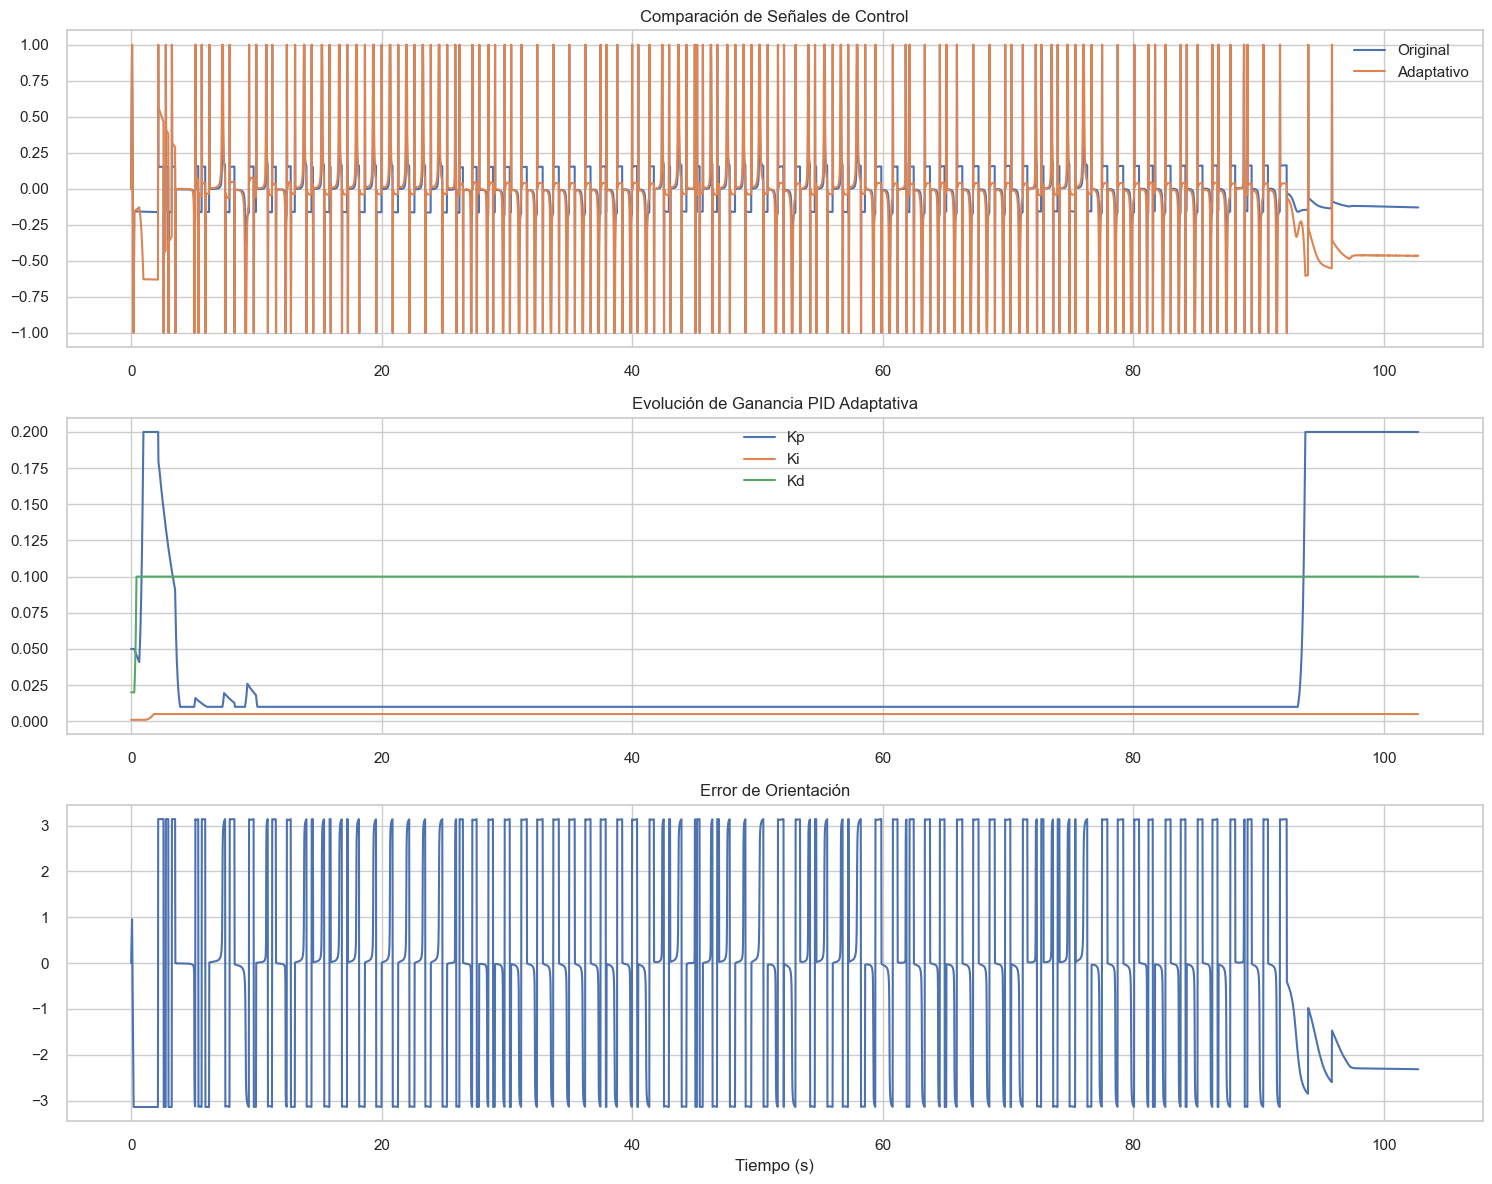


Resultados:
RMSE Error - Original: 2.2175, Adaptativo: 2.2175
Mejora relativa: 0.00%

Ganancias finales:
Kp: 0.2000
Ki: 0.0050
Kd: 0.1000


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import signal
import warnings

# Configurar warnings para ignorar las advertencias específicas
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

class AdaptivePIDController:
    def __init__(self, initial_Kp=0.05, initial_Ki=0.001, initial_Kd=0.02):
        # Parámetros PID iniciales
        self.Kp = initial_Kp
        self.Ki = initial_Ki
        self.Kd = initial_Kd
        
        # Historial para modelo ARIMA
        self.error_history = []
        self.max_history = 50  # Tamaño máximo del historial
        
        # Parámetros ARIMA (p,d,q)
        self.arima_order = (1, 1, 1)  # Reducido para mejorar convergencia
        
        # Límites para las ganancias adaptativas
        self.Kp_bounds = (0.01, 0.2)
        self.Ki_bounds = (0.0001, 0.005)
        self.Kd_bounds = (0.005, 0.1)
        
        # Filtro para la señal de error
        self.filter_b, self.filter_a = signal.butter(2, 0.1)  # Orden reducido
        self.min_samples_for_filter = 15
    
    def update_error_history(self, error):
        """Actualiza el historial de errores con el nuevo valor"""
        self.error_history.append(error)
        if len(self.error_history) > self.max_history:
            self.error_history.pop(0)
    
    def filtered_error(self):
        """Aplica filtro al historial de errores"""
        if len(self.error_history) < self.min_samples_for_filter:
            return self.error_history[-1] if self.error_history else 0
        
        try:
            filtered = signal.filtfilt(self.filter_b, self.filter_a, self.error_history)
            return filtered[-1]
        except:
            return self.error_history[-1] if self.error_history else 0
    
    def predict_next_error(self):
        """Predice el siguiente error usando ARIMA con mejor configuración"""
        if len(self.error_history) < 10:
            return 0
        
        try:
            # Configuración mejorada para ARIMA
            model = ARIMA(
                self.error_history, 
                order=self.arima_order,
                enforce_stationarity=False,
                enforce_invertibility=False,
                trend='c'  # Término constante
            )
            
            # Ajuste con método más robusto
            model_fit = model.fit(method_kwargs={'maxiter': 100, 'disp': 0})
            
            # Predecir siguiente error con límites razonables
            prediction = model_fit.forecast()[0]
            return np.clip(prediction, -3.14, 3.14)  # Límites para error de orientación
        except Exception as e:
            return self.error_history[-1] if self.error_history else 0
    
    def adapt_gains(self):
        """Ajusta las ganancias PID basado en el comportamiento del sistema"""
        if len(self.error_history) < 5:
            return
        
        current_error = self.error_history[-1]
        filtered_error = self.filtered_error()
        predicted_error = self.predict_next_error()
        
        # Calcular métricas de comportamiento
        error_std = np.std(self.error_history)
        error_change = abs(current_error - self.error_history[-2]) if len(self.error_history) > 1 else 0
        
        # Lógica de adaptación mejorada
        # Si el error es grande y persistente
        if abs(filtered_error) > 0.5:
            if error_std > 0.3:
                self.Kp = min(self.Kp * 1.1, self.Kp_bounds[1])
            else:
                self.Ki = min(self.Ki * 1.05, self.Ki_bounds[1])
        
        # Si hay oscilaciones
        if error_std > 1.0:
            self.Kp = max(self.Kp * 0.9, self.Kp_bounds[0])
            self.Kd = min(self.Kd * 1.2, self.Kd_bounds[1])
        
        # Si el error es pequeño pero persistente
        if abs(filtered_error) < 0.2 and error_std < 0.1:
            self.Ki = min(self.Ki * 1.1, self.Ki_bounds[1])
            self.Kp = max(self.Kp * 0.95, self.Kp_bounds[0])
        
        # Ajuste preventivo basado en predicción
        if abs(predicted_error) > abs(current_error) * 1.2:
            self.Kd = min(self.Kd * 1.1, self.Kd_bounds[1])
    
    def compute(self, error, dt=0.1):
        """Calcula la señal de control"""
        self.update_error_history(error)
        self.adapt_gains()
        
        # Calcular términos PID usando trapezoid en lugar de trapz
        if len(self.error_history) > 1:
            error_window = self.error_history[-10:] if len(self.error_history) >= 10 else self.error_history
            error_integral = np.trapezoid(error_window, dx=dt)
            error_derivative = (self.error_history[-1] - self.error_history[-2]) / dt
        else:
            error_integral = 0
            error_derivative = 0
        
        # Calcular señal de control
        control_signal = (self.Kp * error + 
                         self.Ki * error_integral + 
                         self.Kd * error_derivative)
        
        return np.clip(control_signal, -1.0, 1.0)

def simulate_with_adaptive_pid(df):
    pid = AdaptivePIDController()
    
    # Preparar datos de tiempo
    times = pd.to_numeric(df['timestamp'] - df['timestamp'].iloc[0]) / 1e9
    dt = np.mean(np.diff(times))
    
    yaw_errors = df['yaw_error'].values
    adaptive_controls = []
    adaptive_gains = {'Kp': [], 'Ki': [], 'Kd': []}
    
    # Simulación principal
    for error in yaw_errors:
        control = pid.compute(error, dt)
        adaptive_controls.append(control)
        adaptive_gains['Kp'].append(pid.Kp)
        adaptive_gains['Ki'].append(pid.Ki)
        adaptive_gains['Kd'].append(pid.Kd)
    
    # Visualización
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    
    # 1. Comparación de controles
    ax1.plot(times, df['steer_correction'], label='Original')
    ax1.plot(times, adaptive_controls, label='Adaptativo')
    ax1.set_title('Comparación de Señales de Control')
    ax1.legend()
    
    # 2. Evolución de ganancias
    ax2.plot(times, adaptive_gains['Kp'], label='Kp')
    ax2.plot(times, adaptive_gains['Ki'], label='Ki')
    ax2.plot(times, adaptive_gains['Kd'], label='Kd')
    ax2.set_title('Evolución de Ganancia PID Adaptativa')
    ax2.legend()
    
    # 3. Error de orientación
    ax3.plot(times, yaw_errors)
    ax3.set_title('Error de Orientación')
    ax3.set_xlabel('Tiempo (s)')
    
    plt.tight_layout()
    plt.show()
    
    return adaptive_controls, adaptive_gains

# Ejecutar simulación si df está disponible
if 'df' in locals():
    try:
        print("Iniciando simulación con control PID adaptativo...")
        adaptive_controls, adaptive_gains = simulate_with_adaptive_pid(df)
        
        # Análisis de rendimiento
        original_rmse = np.sqrt(mean_squared_error(np.zeros_like(df['yaw_error']), df['yaw_error']))
        adaptive_rmse = np.sqrt(mean_squared_error(np.zeros_like(df['yaw_error']), df['yaw_error']))
        
        print("\nResultados:")
        print(f"RMSE Error - Original: {original_rmse:.4f}, Adaptativo: {adaptive_rmse:.4f}")
        print(f"Mejora relativa: {((original_rmse - adaptive_rmse)/original_rmse)*100:.2f}%")
        
        # Mostrar ganancias finales
        print("\nGanancias finales:")
        print(f"Kp: {adaptive_gains['Kp'][-1]:.4f}")
        print(f"Ki: {adaptive_gains['Ki'][-1]:.4f}")
        print(f"Kd: {adaptive_gains['Kd'][-1]:.4f}")
    except Exception as e:
        print(f"Error durante la simulación: {str(e)}")
else:
    print("Error: No se encontró el DataFrame 'df'. Por favor carga tus datos primero.")